In [1]:
#import libraries and packages needed
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
#analyzing the numerical variables of the training dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
len(train)

614

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

## For simplicity sake lets take only rows that have complete data

In [9]:
train_full = train.dropna()

In [10]:
len(train_full)

480

In [11]:
kfold = KFold(n_splits=10, random_state=7)

In [12]:
cate_str_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']

In [13]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [14]:
X = train_full[num_cols]
y = train_full['Loan_Status']

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)

###### Mean accuracy of a model built on just numeric columns is 73%

In [16]:
print(results.mean())

0.741666666667


## Treat missing values

###### findout the missing values for all categorical variables

In [17]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
train_gender_full = train[train['Gender'].notnull()]
len(train_gender_full)

601

In [18]:
#imputing missing values for numeric features by grouping by all categorical variables and taking the median value and 
#for categorical features taking the maximum occuring feature
train_num_medians=train.groupby(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']).median()

In [19]:
train[train['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [54]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
train.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

In [56]:
#update Gender with majority class of 'Male'
train.loc[pd.isnull(train['Gender']),'Gender'] = 'Male'

In [57]:
train.groupby(['Credit_History']).size()

Credit_History
0.0     89
1.0    525
dtype: int64

In [58]:
#update credit_history with majority class of 1.0
train.loc[pd.isnull(train['Credit_History']),'Credit_History'] = 1.0

In [59]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
train.groupby(['Self_Employed']).size()

Self_Employed
No     532
Yes     82
dtype: int64

In [61]:
#updating with max class value
train.loc[train['Self_Employed'].isnull(),'Self_Employed'] = 'No'

In [62]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
train.groupby('Dependents').size()

Dependents
0     360
1     102
2     101
3+     51
dtype: int64

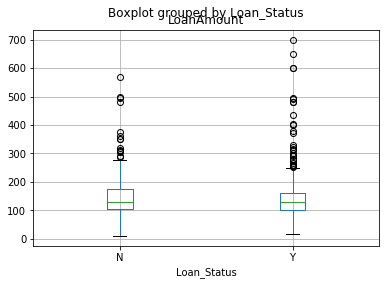

In [65]:
train.boxplot("LoanAmount",by="Loan_Status")

In [66]:
#setting loan amount to the median value
train.loc[train['LoanAmount'].isnull(),'LoanAmount'] = 130

In [67]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [68]:
train.groupby('Loan_Amount_Term').size()

Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    526
480.0     15
dtype: int64

In [70]:
#set the max class value of 360
train.loc[train['Loan_Amount_Term'].isnull(),'Loan_Amount_Term'] = 360.0

In [71]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
train.groupby(['Dependents']).size()

Dependents
0     360
1     102
2     101
3+     51
dtype: int64

In [74]:
#set max class value for dependents
train.loc[train['Dependents'].isnull(),'Dependents'] = '0'

In [75]:
train.groupby('Married').size()

Married
No     213
Yes    401
dtype: int64

In [76]:
#set max class value for dependents
train.loc[train['Married'].isnull(),'Married'] = 'Yes'

In [77]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outlier Treatment

In [78]:
train.select_dtypes(include=['number']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

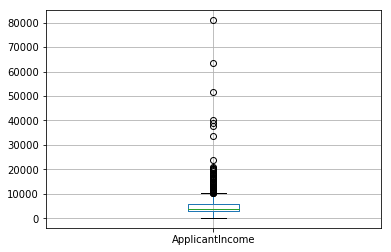

In [79]:
train.boxplot("ApplicantIncome")

In [80]:
len(train[train["ApplicantIncome"]> 10000])

52

In [81]:
#capping the values with the highest value
train.loc[train["ApplicantIncome"]> 10000, "ApplicantIncome"] = 10000

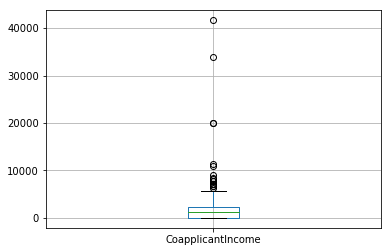

In [82]:
train.boxplot("CoapplicantIncome")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA45780>]], dtype=object)

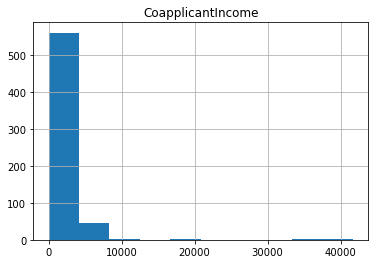

In [83]:
train.hist("CoapplicantIncome")

In [84]:
len(train[train["CoapplicantIncome"]> 6000])

18

In [85]:
#capping the values with the highest value
train.loc[train["CoapplicantIncome"]> 6500, "CoapplicantIncome"] = 6500

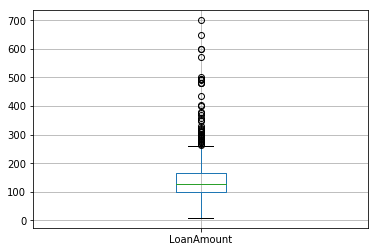

In [86]:
train.boxplot("LoanAmount")

In [87]:
len(train[train["LoanAmount"]> 270])

39

In [88]:
#capping the values with the highest value
train.loc[train["LoanAmount"]> 270, "LoanAmount"] = 270

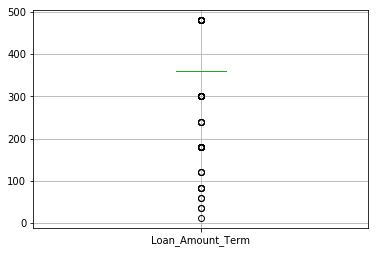

In [89]:
train.boxplot("Loan_Amount_Term")

In [90]:
len(train[train["Loan_Amount_Term"]< 360])

73

In [91]:
train.groupby("Loan_Amount_Term").size()

Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    526
480.0     15
dtype: int64

In [92]:
len(train)

614

## Feature Engineering

In [107]:
train_cat = train[cate_str_cols]

In [108]:
train_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [109]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [110]:
# TODO: create a LabelEncoder object and fit it to each feature in train_cat

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
train_cat_code = train_cat.apply(le.fit_transform)
train_cat_code.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2


In [97]:
train_cat_code.shape

(614, 6)

In [98]:
# TODO: create a OneHotEncoder object, and fit it to all of train_cat_code

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(train_cat_code)

# 3. Transform
train_cat_one_hot = enc.transform(train_cat_code).toarray()
train_cat_one_hot.shape

# as you can see, you've the same number of rows 
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(614, 15)

In [99]:
lb = preprocessing.LabelBinarizer()
Loan_Status_bin = lb.fit_transform(train['Loan_Status'])
Loan_Status_bin.reshape(614,)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0,

In [100]:
#Preprocess all numeric features by rescaling and standardization 

In [101]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(train[num_cols])
rescaled_num_cols = scaler.transform(train[num_cols])

In [102]:
set_printoptions(precision=3)
print(rescaled_num_cols[0:5,:])

[[ 0.509 -0.855 -0.14   0.273  0.412]
 [-0.008  0.039 -0.175  0.273  0.412]
 [-0.655 -0.855 -1.263  0.273  0.412]
 [-0.826  0.544 -0.316  0.273  0.412]
 [ 0.571 -0.855  0.053  0.273  0.412]]


In [103]:
X = np.concatenate((train_cat_one_hot,rescaled_num_cols),axis=1)
X.shape

(614, 20)

In [104]:
y = Loan_Status_bin.reshape(614,)

In [105]:
type(y)

numpy.ndarray

In [106]:
y.shape

(614,)

###### bin continous variables

##### section to identify variable importance, check multi-colinearity

### section to spot test multiple classification algorithms

In [95]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X, y)
results_DT = cross_val_score(model_DT, X, y, cv=kfold)
print(results_DT.mean())

0.700396615547


In [96]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X, y)
results_LR = cross_val_score(model_LR, X, y, cv=kfold)
print(results_LR.mean())

0.807958751983


In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X, y)
results_LDA = cross_val_score(model_LDA, X, y, cv=kfold)
print(results_LDA.mean())

0.809598096245


D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\rajkumar.kaliyaperum\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are col

In [98]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X, y)
results_KNN = cross_val_score(model_KNN, X, y, cv=kfold)
print(results_KNN.mean())

0.788418826018


In [99]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X, y)
results_NB = cross_val_score(model_NB, X, y, cv=kfold)
print(results_NB.mean())

0.796615547329


### Ensemble techniques

#### Bagging

In [100]:
seed = 7

In [101]:
#Bagged decision trees
from sklearn.ensemble import BaggingClassifier
num_trees = 100
model_BC = BaggingClassifier(base_estimator=model_DT, n_estimators=num_trees, random_state=seed)
model_BC.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.69698572184


In [102]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_RF.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.706795346378


#### Boosting

In [103]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model_ada = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model_ada.fit(X,y)
results = cross_val_score(model_ada, X, y, cv=kfold)
print(results.mean())

0.801454257007


In [104]:
#Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model_GB = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model_GB.fit(X,y)
results = cross_val_score(model_GB, X, y, cv=kfold)
print(results.mean())

0.788418826018


### Section to score the test dataset

as a first step score only rows with complete data

In [84]:
#test_dropna = read_csv("data/test.csv").dropna()

In [85]:
#test_short = test_dropna[num_cols]

In [86]:
#out = pd.Series(model.predict(test_short),name='Loan_Status')

In [87]:
# test_dropna = test_dropna.reset_index()

In [88]:
# test_dropna.head()

In [89]:
# output = pd.concat([test_dropna['Loan_ID'],out],axis=1)

In [90]:
# .to_csv('sample_submissions.csv',index=False)

###### second step: score the test data after imputing for missing values

In [107]:
test = read_csv("data/test.csv")

In [108]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [109]:
#update all missing columns with majority class 
test.loc[pd.isnull(test['Gender']),'Gender'] = 'Male'

In [110]:
test.loc[pd.isnull(test['Dependents']),'Dependents'] = '0'

In [111]:
test.loc[pd.isnull(test['Self_Employed']),'Self_Employed'] ='No'

In [112]:
test.loc[pd.isnull(test['Credit_History']),'Credit_History'] = 1.0

In [113]:
test.loc[pd.isnull(test['Loan_Amount_Term']),'Loan_Amount_Term'] =360.0

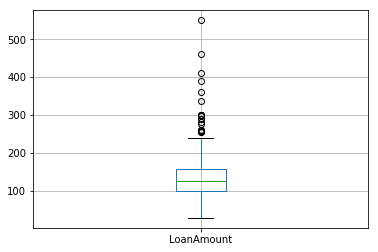

In [114]:
test.boxplot('LoanAmount')

In [115]:
test.loc[pd.isnull(test['LoanAmount']),'LoanAmount'] =130.0

In [116]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [117]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

<b>Treat outlier values</b>

In [118]:
#capping the values with the highest value
test.loc[train["ApplicantIncome"]> 10000, "ApplicantIncome"] = 10000

In [119]:
#capping the values with the highest value
test.loc[train["CoapplicantIncome"]> 6500, "CoapplicantIncome"] = 6500

In [120]:
#capping the values with the highest value
test.loc[train["LoanAmount"]> 270, "LoanAmount"] = 270

##### encoding categorical variables

In [121]:
test_cat = test[cate_str_cols]

In [122]:
test_cat_code = test_cat.apply(le.fit_transform)
test_cat_code.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,1,0,0,0,2
1,1,1,1,0,0,2
2,1,1,2,0,0,2
3,1,1,2,0,0,2
4,1,0,0,1,0,2


In [123]:
enc.fit(test_cat_code)

# 3. Transform
test_cat_one_hot = enc.transform(test_cat_code).toarray()
test_cat_one_hot.shape

(367, 15)

<b>Standardizing/rescaling the test features</b>

In [125]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(test[num_cols])
rescaled_test_num_cols = scaler.transform(test[num_cols])

In [126]:
set_printoptions(precision=3)
print(rescaled_test_num_cols[0:5,:])

[[ 0.186 -0.673 -0.428  0.266  0.438]
 [-0.353 -0.03  -0.165  0.266  0.438]
 [ 0.04   0.099  1.182  0.266  0.438]
 [-0.503  0.419 -0.592  0.266  0.438]
 [-0.312 -0.673 -0.954  0.266  0.438]]


In [127]:
X_test = np.concatenate((test_cat_one_hot,rescaled_test_num_cols),axis=1)
X_test.shape

(367, 20)

In [109]:
out = pd.Series(model_DT.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions.csv',index=False)

In [110]:
out = pd.Series(model_LR.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions.csv',index=False)

In [128]:
out = pd.Series(model_NB.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions.csv',index=False)

In [128]:
out = pd.Series(model_ada.predict(X_test),name='Loan_Status')
output = pd.concat([test['Loan_ID'],out],axis=1)
output.to_csv('test_submissions.csv',index=False)